# PRACTICA 1: Analisis de sentimientos en Twitter

El objetivo de la clasificacion de sentimientos es identificar la polaridad del contenido de un texto. Este problema se puede abordar con un clasificador binario (positivo o negativo) o con una calificacion en los reales (positiva, negativa o neutra).
Las aplicaciones del analisis de sentimientos son inmensas, por ejemplo: reputacion de una marca o empresa, favoritismo de politicos, opinion sobre una pelicula o producto, entre otros.

## Los pasos para abordar este tipo de problemas son:
![pasos](IMAGENES/Seleccion_823.png)

### Recopilar los datos
Debido a que nos interesa hacer clasificacion de sentimientos en Twitter, debemos buscar:
>  1\. Una alternativa para obtener Tweets, en este caso usaremos la API de Twiiter para Python: Tweepy. En otros casos en los que se disponga de una API tendremos que hacer un poco de scrapping.<br>
>  2\. Una base de datos de entrenamiento y prueba correctamente etiquetada.

### Usemos la API de Twitter

Twitter ofrece tres APIs: Streaming API,  REST API y  Search API aplicables a necesidades diferentes. En este ejercicio vamos a usar la Search API, la cual suministra los tweets con una profundidad en el tiempo de 7 días que se ajustan al query solicitado. Es posible filtrar por, usuario, idioma y localización.

![API](IMAGENES/Seleccion_834.png)
Tomada de Mastering social media mining with Python


In [0]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [0]:
import tweepy
# esta informacion me la da Tweeter developer account
#consumer_key=<>
#consumer_secret=<>

#access_token=<>
#access_token_secret=<>

In [7]:
# Obtengo los encabezados de una fuente externa
str_encabezados = 'polarity,tweet_id,tweet_date,lyx_query,tweet_user,tweet_text'
encabezados = str_encabezados.split(',') # separo los encabezados por comas
print("Cantidad encabezados:", len(encabezados)) # valido que la longitud de encabezados corresponda con el numero de columnas de datos



Cantidad encabezados: 6


In [14]:
# Cargo el dataset
tweet_dataset = pd.read_csv("training.1600000.processed.noemoticon.csv", header=None, encoding = "ISO-8859-1") # Indico que el dataset original no tiene encabezados o nombre de columnas
# Llamo y asocio las columnas de acuerdo a la lista encabezados
# encoding = "ISO-8859-1" es lo mismo que latin 1

# Cargamos la data utilizando la libreria Pandas. Devuelve un dataframe
# con toda la data

'''
PRACTICA_PATH = os.path.join("datasets","AntiSenti")# Esta linea la adicione dada la nota de deshabilitacion de la linea anterior

def load_practica_data(practica_path=PRACTICA_PATH):
    csv_path = os.path.join(practica_path, "training.1600000.processed.noemoticon.csv")
    return pd.read_csv(csv_path)

practica = load_practica_data()
practica.head()
'''

tweet_dataset.columns = encabezados # Llamo y asocio las columnas de acuerdo a la lista encabezados
print(tweet_dataset.head())

FileNotFoundError: ignored

In [0]:
# Esta balanceado el dataset?
print("Longitud del dataset", len(tweet_dataset))
print()
print ("0: Sentimiento Negativo // 4: Sentimiento Positivo \n")
print("Categorias Sentimientos Balanceada?: \n", tweet_dataset.loc[:,'polarity'].value_counts())

#balanceado = tweet_dataset['polarity'].value_counts()
#print ("dataset balanceado? \n", balanceado)


Longitud del dataset 1600000

0: Sentimiento Negativo // 4: Sentimiento Positivo 

Categorias Sentimientos Balanceada?: 
 4    800000
0    800000
Name: polarity, dtype: int64


In [0]:
# Descripcion de la data
print("Data information: \n")
print (tweet_dataset.info())


Data information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
polarity      1600000 non-null int64
tweet_id      1600000 non-null int64
tweet_date    1600000 non-null object
lyx_query     1600000 non-null object
tweet_user    1600000 non-null object
tweet_text    1600000 non-null object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB
None


In [0]:
# Description of the data
print()
print ("Data describe:\n", tweet_dataset.describe())


Data describe:
            polarity      tweet_id
count  1.600000e+06  1.600000e+06
mean   2.000000e+00  1.998818e+09
std    2.000001e+00  1.935761e+08
min    0.000000e+00  1.467810e+09
25%    0.000000e+00  1.956916e+09
50%    2.000000e+00  2.002102e+09
75%    4.000000e+00  2.177059e+09
max    4.000000e+00  2.329206e+09


In [0]:
# usando la funcion head imprime los 5 primero registros con sentimiento positivo.
#print("Primeros 5 registros positivos", (tweet_dataset['polarity'] = 4)

tweet_dataset[tweet_dataset['polarity'] == 4].head()

,polarity,tweet_id,tweet_date,lyx_query,tweet_user,tweet_text
800000,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
800001,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
800002,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
800004,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone


In [0]:
# usando iloc accedamos al valor del segundo registro, de sentimiento positivo en el campo TEXTO.

print(tweet_dataset[tweet_dataset['polarity']==4].tweet_text.iloc[1])
print(len(tweet_dataset[tweet_dataset['polarity']==4].tweet_text.iloc[1]))

im meeting up with one of my besties tonight! Cant wait!!  - GIRL TALK!!
72


In [0]:
#usando iloc accedamos al valor del primer registro, de sentimiento negativo en el campo TEXTO.
#calculemos la longitud del tweet anterior.

print(tweet_dataset[tweet_dataset['polarity']==0].tweet_text.iloc[1])
print(len(tweet_dataset[tweet_dataset['polarity']==0].tweet_text.iloc[1]))

is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!
111


In [0]:
# Cuales son los descriptores que nos aportan informacion para el analisis de sentimientos?, cuales no?
# usando el metodo drop() de los DataFrame, elimina los campos que no son necesarios para el analisis 
# de sentimientos, recuerda ajustar un atributo en 1 y otro en True.

tweet_dataset.drop(['tweet_id','tweet_date','lyx_query','tweet_user'], axis = 1, inplace = True)
# axis = 1 elimina valores de la columna     
tweet_dataset.head()

,polarity,tweet_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [0]:
# valida si hay filas con nan y en caso de que si usa el metodo .dropna(), ajusta el parametro inplace en True.



In [0]:
# usando list comprehension asigna a la lista longitudtweets la longitud del texto con los tweets, luego calcula la longitud de la lista
longitudtweets = [len(i) for i in tweet_dataset['tweet_text']] # cojame el texto de cada tweet y calcule la longitudes
print("longitud tweets: ", len(longitudtweets))



longitud tweets:  1600000


In [0]:
print ("longitud del tweet con mayor extension: ", max(longitudtweets))

longitud del tweet con mayor extension:  374


In [0]:
?plt.hist

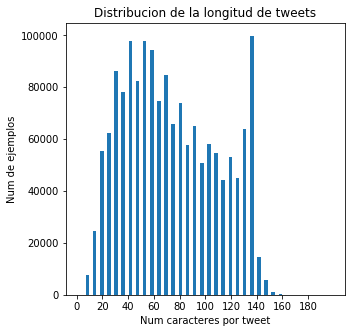

In [0]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(5,5))
plt.hist(longitudtweets,36,rwidth=.5,range=(0,200))

plt.xlabel('Num caracteres por tweet')
plt.ylabel('Num de ejemplos')
plt.title('Distribucion de la longitud de tweets')
plt.xticks(np.arange(0,200,20))
plt.show()

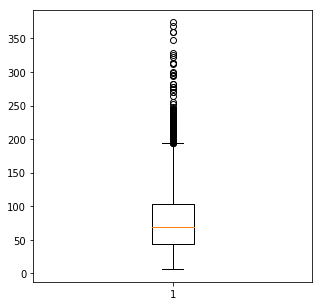

In [0]:
fig, ax = plt.subplots(figsize=(5,5))
plt.boxplot(longitudtweets)
plt.show()

In [0]:
#asignar la lista longitudtweets a una columna del DataFrame, llamar la columna "LONGITUD"
#En este punto deberias tener tres columnas
#Nota: en el momento que se creo el dataset Twitter solo admitia un maximo de 140 caracteres

tweet_dataset["longitud"]=longitudtweets

In [0]:
tweet_dataset[tweet_dataset['longitud']==374]

,polarity,tweet_text,longitud
1295281,4,@catfish_ohm à¹à¸à¹à¸²à¹à¸«à¹à¸?à¸²à¸£à¹...,374


In [0]:
list(tweet_dataset)

['polarity', 'tweet_text', 'longitud']

In [0]:
tweet_dataset[tweet_dataset.longitud > 140].head(10)

,polarity,tweet_text,longitud
213,0,Awwh babs... you look so sad underneith that s...,142
226,0,Tuesdayï¿½ll start with reflection ï¿½n then a...,141
279,0,Whinging. My client&amp;boss don't understand ...,145
343,0,@TheLeagueSF Not Fun &amp; Furious? The new ma...,145
400,0,#3 woke up and was having an accident - &quot;...,144
464,0,"My bathtub drain is fired: it haz 1 job 2 do, ...",146
492,0,"pears &amp; Brie, bottle of Cabernet, and &quo...",150
747,0,Have an invite for &quot;Healthy Dining&quot; ...,141
957,0,Damnit I was really digging this season of Rea...,141
1064,0,Why do I keep looking...I know that what I rea...,141


In [0]:
len(tweet_dataset[tweet_dataset.longitud > 140])

17174

In [0]:
#parsing
# construir una funcion que reciba una lista, serie o df y aplique el parsing a cada uno de los elementos, 
#al final la funcion debe regregar los textos procesados.


from bs4 import BeautifulSoup
prueba = BeautifulSoup(tweet_dataset.tweet_text[747], 'lxml')
print (prueba.get_text())
print(len(prueba.get_text())) # imprime la longitud real del tweet, sin &quot por ejemplo


Have an invite for "Healthy Dining" session at Ashok Hotel today with Exec Chef R.Chopra but damn workload - will have to skip it! 
131


In [0]:
from bs4 import BeautifulSoup
prueba = BeautifulSoup(tweet_dataset.tweet_text[492], 'lxml')
print (prueba.get_text())
print(len(prueba.get_text()))

pears & Brie, bottle of Cabernet, and "Win a Date With Tad Hamilton"... oh gawwd my life flashed forward to when I'm 40 with my 75 cats 
136


In [0]:
#imprimir df.TEXTO[0], las paginas web nos dan informacion sobre los sentimientos?
print(tweet_dataset.tweet_text[0])


@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D


In [0]:
#usar re.sub(r'ACA VA LA EXPRESION REGULAR PARA ENCONTRAR PAGINAS WEB',' ',df.TEXTO[0])

import re
a = re.sub(r'https?://[\w./]+ |www.[\S]+','',tweet_dataset.tweet_text[0]) # ? significa opcional
print(a)
# r: de expresiones regulares, recursiva
# busque desde un caracter,punto o slash - \w./
# | o
# y que lo reemplace por un espacio  
# cualquier cosa que no sea un espacio a-z, A-Z,0-9    - \S ... ese mayuscula es todo lo contrario a s minuscula
# S que no sea espacio y s que sea espacio

@switchfoot - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D


In [0]:
# usar re.sub(r'ACA VA LA EXPRESION REGULAR PARA ENCONTRAR LAS MENCIONES',' ',df.TEXTO[0])

re.sub(r'@\w+',' ',a)

"  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [0]:
#vamos a eliminar los #, numeros y signos de puntuacion. 
# Usar re.sub(r"[a-zA-Z]", " ", df.TEXTO[5204])

re.sub(r"[^a-zA-Z]", " ",tweet_dataset.tweet_text[5204]) # elimine aquello que NO inicia por caracter.
       # ^ significa que inicia. si pongo el gorrito fuera es que comience por ...  (r"^[a-zA-Z]

' untwitter the  quot trash bin quot  solution doesn t work  the tweet is in the indexes and propagated  even if it disappears from my personal list '

In [0]:
# explorar la siguiente expresion regular: re.sub(r"(.)\1{2,}",r'\1\1', text5)
re.sub(r"(.)\1{2,}",r'\1\1', text5)

NameError: name 'text5' is not defined

![configuracionAPI](IMAGENES/Seleccion_825.png)

In [0]:
auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

api=tweepy.API(auth,wait_on_rate_limit=True)

query = 'Trump'

max_tweets = 20
#searched_tweets = [status for status in tweepy.Cursor(api.search, q=query,tweet_mode="extended",lang='en').items(max_tweets)]


tweets=[]
for tweet_info in tweepy.Cursor(api.search, q=query, lang = 'en', tweet_mode='extended').items(max_tweets):
    if 'retweeted_status' in dir(tweet_info):
        tweet=tweet_info.retweeted_status.full_text
        tweets.append(tweet)
    else:
        tweet=tweet_info.full_text
        tweets.append(tweet)


In [0]:
for tw in tweets[:5]:
    print("--------------------")
    print(tw)
    print("--------------------\n")

### Base de datos de entrenamiento y prueba

En ML nuestros modelos son tan buenos como lo que le entramos para entrenarlos, si entra basura, entonces, saldra basura.

Tambien es importante la cantidad de ejemplos de nuestra base de datos, mientras mas ejemplos tenemos mas posibilidades de **generalizar**.

Debemos buscar una **base de datos balanceada** o de los contrario nuestro modelos podrian tener sesgos hacia una clase determinada.


### Exploremos la base de datos Sentimient140 de la universidad Stanford

__[Enlace de descarga de la base de datos de entrenamiento y prueba](http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip)__
    
__[Paper en el que se explica como fue construida la base de datos](https://cs.stanford.edu/people/alecmgo/papers/TwitterDistantSupervision09.pdf)__

A continuacion vamos a explorar la base de datos

![sesgos2](IMAGENES/Seleccion_831.png)


## Paso a paso

1. Vamos importar el dataset usando pandas.<br>
> * Ten encuenta el .csv no tiene header
> * Crea una lista con el nombre de las columnas del header
> * imprime los 10 primero tweets usando el metodo head()
> * asigna al atributo encoding la codificacion "ISO-8859-1"
> * Cuales son los descriptores que nos aportan informacion para el analisis de sentimientos?
2. usando la funcion head imprime los 5 primero registros con sentimiento positivo.<br>
3. usando iloc accedamos al valor del segundo registro, de sentimiento positivo en el campo TEXTO.<br>
4. calculemos la longitud del tweet anterior.<br>
5. usando iloc accedamos al valor del primer registro, de sentimiento negativo en el campo TEXTO.<br>
6. calculemos la longitud del tweet anterior.<br>
7. usando el metodo drop() de los DataFrame, elimina los campos que no son necesarios para el analisis de sentimientos, recuerda ajustar un atributo en 1 y otro en True.
8. valida si hay filas con nan y en caso de que si usa el metodo .dropna(), ajusta el parametro inplace en True.
9. revisemos que la base de datos este balanceada. Cuantos registros hay que la clase positiva, negativa y neutra?
10. usando list comprehension asigna a la lista longitudtweets la longitud del texto con los tweets, luego calcula la longitud de la lista
11. <br>
> * con la lista anterior, usando import numpy as np e import matplotlib.pyplot as plt, crear un histograma. En el eje X del histograma esta la logitud de los tweets y en el eje Y el conteo de Tweets con la longitud dada.<br>
12. crea un boxplot con la lista longitudtweets.<br>
13. asignar la lista longitudtweets a una columna del DataFrame, llamar la columna "LONGITUD"<br>
14. En este punto deberias tener tres columnas<br>
Nota: en el momento que se creo el dataset Twitter solo admitia un maximo de 140 caracteres<br>
15. Imprimir los 10 primeros tweets con mas de 140 caracteres, calcular cuantos hay y buscar 3 posibles razones a esta situacion.<br>
16. Prueba las siguientes lineas:<br>
<br>
from bs4 import BeautifulSoup <br>
prueba = BeautifulSoup(df.TEXTO[747], 'lxml')<br>
print (prueba.get_text())<br>

Que diferencia hay entre el texto sin pasar por el parsing?<br>
17. Con las lineas anteriores construir una funcion que reciba una lista, serie o df y aplique el parsing a cada un de los elementos, al final la funcion debe regregar los textos procesados.
18. imprimir df.TEXTO[0], las paginas web nos dan informacion sobre los sentimientos?
19. usar re.sub(r'ACA VA LA EXPRESION REGULAR PARA ENCONTRAR PAGINAS WEB',' ',df.TEXTO[0])
20. las menciones dan informacion sobre los sentimientos?
21. usar re.sub(r'ACA VA LA EXPRESION REGULAR PARA ENCONTRAR LAS MENCIONES',' ',df.TEXTO[0])
22. vamos a eliminar lops #, numeros y signos de puntuacion. Usar re.sub(r"[a-zA-Z]", " ", df.TEXTO[5204])
23. explorar la siguiente expresion regular: re.sub(r"(.)\1{2,}",r'\1\1', text5)
24. con todo lo visto antes construir una funcion que tome todos los textos y los limpie. Nota: el orden es importante.
24. comparar los textos limpios con los sucios
25. graficas el boxplot y el histograma del texto limpio
26. sobre el texto limpio aplicar CountVectorizer y TfidfVectorizer, para obtener dos modelos de representacion de texto, no sin antes eliminar las stopwords
27. cuantos descriptores tenemos? ejemplo: print(len(count_vectorizer.get_feature_names()))
28. entrena 3 modelos y ajusta sus hiperparametros, usando lo visto en la reunion anterior. (El detalle del ajuste de hiperparametros se vera en reuniones posteriores)
29. aplica PCA y usando la regla de dedo selecciona los nuevos descriptores (regresar a la charla de reduccion de la dimension)
30. repite el paso 28 con los nuevos descriptores.
31. selecciona tu mejor modelo y guardalo <br>
32. usando la API de Twitter descarga 100 tweets sobre un politico, artista, marca o empresa
33. aplicale la funcion de preprocesamiento, recuerda que si en tu preprocesamiento usaste PCA, entonces, aca tambien lo debes hacer.
33. calcula el porcentaje de sentimientos positivos y negativos sobre tus elecciones del punto 32.

### 36. Cuentanos tus resultados

### Correccion de errores ortograficos

Las siguientes funciones van de cuenta de Peter Norvig

http://norvig.com/spell-correct.html


In [0]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('big.txt').read()))

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))